In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Load dataset
df = pd.read_csv("uber_stock_data.csv")
df

,Date,Adj Close,Close,High,Low,Open,Volume
0,2019-05-10,41.570000,41.570000,45.000000,41.060001,42.000000,186322500
1,2019-05-13,37.099998,37.099998,39.240002,36.080002,38.790001,79442400
2,2019-05-14,39.959999,39.959999,39.959999,36.849998,38.310001,46661100
3,2019-05-15,41.290001,41.290001,41.880001,38.950001,39.369999,36086100
4,2019-05-16,43.000000,43.000000,44.060001,41.250000,41.480000,38115500
...,...,...,...,...,...,...,...
1439,2025-01-30,66.589996,66.589996,67.222000,63.419998,63.419998,33246500
1440,2025-01-31,66.849998,66.849998,67.870003,66.333000,67.089996,19805600
1441,2025-02-03,67.290001,67.290001,68.849998,65.178001,65.300003,25290000
1442,2025-02-04,69.750000,69.750000,70.190002,67.690002,67.690002,33786200


In [5]:
#EDA Analysis
# Convert 'Date' to datetime format and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [7]:
# Basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1444 entries, 2019-05-10 to 2025-02-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1444 non-null   float64
 1   Close      1444 non-null   float64
 2   High       1444 non-null   float64
 3   Low        1444 non-null   float64
 4   Open       1444 non-null   float64
 5   Volume     1444 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 79.0 KB
None


In [9]:
#summary
print(df.describe())


         Adj Close        Close         High          Low         Open  \
count  1444.000000  1444.000000  1444.000000  1444.000000  1444.000000   
mean     44.465374    44.465374    45.287511    43.643301    44.493022   
std      15.594262    15.594262    15.740825    15.482652    15.643967   
min      14.820000    14.820000    17.799999    13.710000    15.960000   
25%      31.930000    31.930000    32.653749    31.181250    31.867499   
50%      41.355001    41.355001    41.910000    40.518499    41.215000   
75%      54.719999    54.719999    55.635001    53.597502    54.664999   
max      86.339996    86.339996    87.000000    84.180000    85.639999   

             Volume  
count  1.444000e+03  
mean   2.429800e+07  
std    1.774084e+07  
min    3.380000e+06  
25%    1.498905e+07  
50%    2.036965e+07  
75%    2.843280e+07  
max    3.642318e+08  


In [11]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


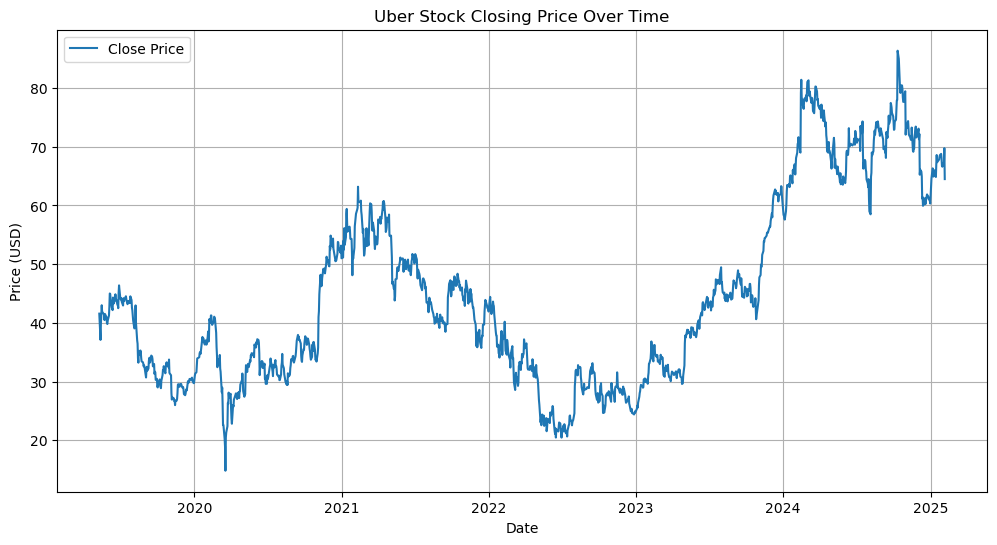

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Uber Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

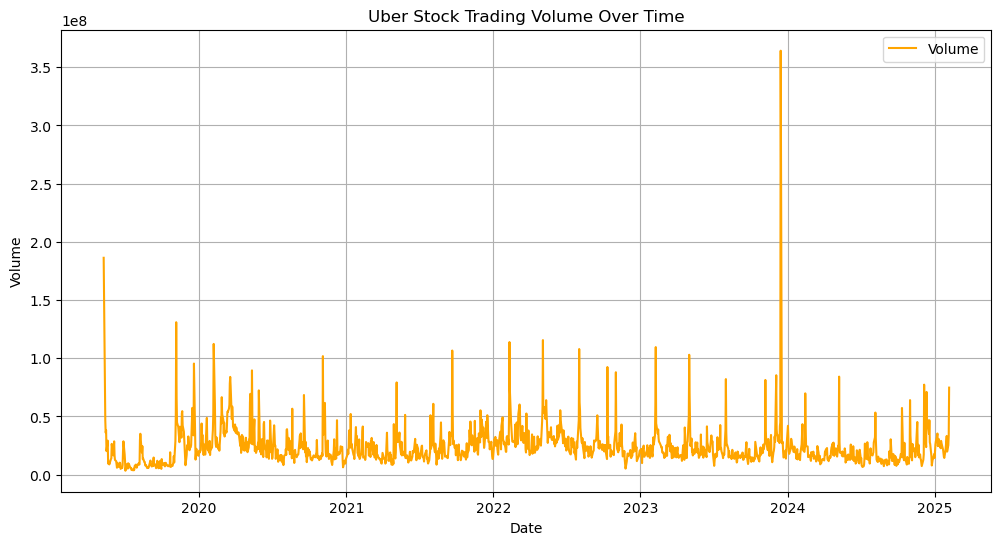

In [15]:
# Plotting volume traded
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], color='orange', label='Volume')
plt.title('Uber Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Calculate Moving Averages
# 20-Day Simple Moving Average
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df

,Adj Close,Close,High,Low,Open,Volume,SMA_20
Date,,,,,,,
2019-05-10,41.570000,41.570000,45.000000,41.060001,42.000000,186322500,NaN
2019-05-13,37.099998,37.099998,39.240002,36.080002,38.790001,79442400,NaN
2019-05-14,39.959999,39.959999,39.959999,36.849998,38.310001,46661100,NaN
2019-05-15,41.290001,41.290001,41.880001,38.950001,39.369999,36086100,NaN
2019-05-16,43.000000,43.000000,44.060001,41.250000,41.480000,38115500,NaN
...,...,...,...,...,...,...,...
2025-01-30,66.589996,66.589996,67.222000,63.419998,63.419998,33246500,66.374999
2025-01-31,66.849998,66.849998,67.870003,66.333000,67.089996,19805600,66.701499
2025-02-03,67.290001,67.290001,68.849998,65.178001,65.300003,25290000,66.907499


In [10]:
# Cumulative Moving Average
df['CMA'] = df['Close'].expanding().mean()
df

,Adj Close,Close,High,Low,Open,Volume,SMA_20,CMA
Date,,,,,,,,
2019-05-10,41.570000,41.570000,45.000000,41.060001,42.000000,186322500,NaN,41.570000
2019-05-13,37.099998,37.099998,39.240002,36.080002,38.790001,79442400,NaN,39.334999
2019-05-14,39.959999,39.959999,39.959999,36.849998,38.310001,46661100,NaN,39.543332
2019-05-15,41.290001,41.290001,41.880001,38.950001,39.369999,36086100,NaN,39.980000
2019-05-16,43.000000,43.000000,44.060001,41.250000,41.480000,38115500,NaN,40.584000
...,...,...,...,...,...,...,...,...
2025-01-30,66.589996,66.589996,67.222000,63.419998,63.419998,33246500,66.374999,44.402521
2025-01-31,66.849998,66.849998,67.870003,66.333000,67.089996,19805600,66.701499,44.418099
2025-02-03,67.290001,67.290001,68.849998,65.178001,65.300003,25290000,66.907499,44.433960


In [11]:
# 20-Day Exponential Moving Average
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()      
df

,Adj Close,Close,High,Low,Open,Volume,SMA_20,CMA,EMA_20
Date,,,,,,,,,
2019-05-10,41.570000,41.570000,45.000000,41.060001,42.000000,186322500,NaN,41.570000,41.570000
2019-05-13,37.099998,37.099998,39.240002,36.080002,38.790001,79442400,NaN,39.334999,41.144285
2019-05-14,39.959999,39.959999,39.959999,36.849998,38.310001,46661100,NaN,39.543332,41.031496
2019-05-15,41.290001,41.290001,41.880001,38.950001,39.369999,36086100,NaN,39.980000,41.056116
2019-05-16,43.000000,43.000000,44.060001,41.250000,41.480000,38115500,NaN,40.584000,41.241247
...,...,...,...,...,...,...,...,...,...
2025-01-30,66.589996,66.589996,67.222000,63.419998,63.419998,33246500,66.374999,44.402521,66.596217
2025-01-31,66.849998,66.849998,67.870003,66.333000,67.089996,19805600,66.701499,44.418099,66.620387
2025-02-03,67.290001,67.290001,68.849998,65.178001,65.300003,25290000,66.907499,44.433960,66.684160


In [12]:
print(df.columns)

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'SMA_20', 'CMA',
       'EMA_20'],
      dtype='object')


In [13]:
data = {'Date':pd.date_range(start='2019-05-01',periods=15,freq='D'),
       'uber stocks': [100,102,101,105,107,110,108,112,114,116,115,117,120,123,125]}
df=pd.DataFrame(data)


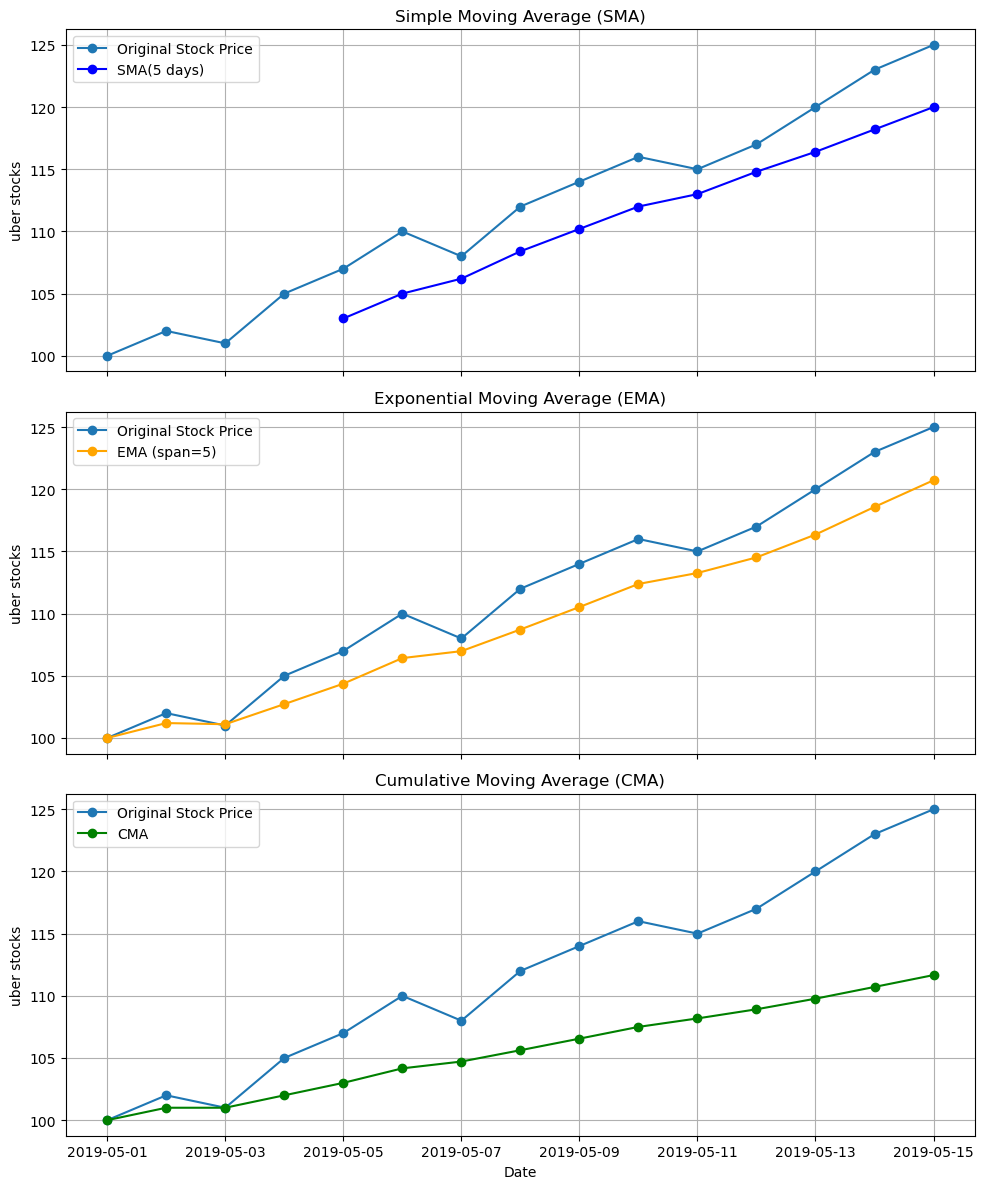

In [14]:
#calculate moving averages
df['SMA'] = df['uber stocks'].rolling(window=5).mean()
df['EMA'] = df['uber stocks'].ewm(span=5).mean()
df['CMA'] = df['uber stocks'].expanding().mean()

#plotting
fig,axes = plt.subplots(3,1, figsize = (10,12),sharex=True)

#simple movingf average(sma)
axes[0].plot(df['Date'],df['uber stocks'],label='Original Stock Price', marker = 'o')
axes[0].plot(df['Date'],df['SMA'],label='SMA(5 days)',marker='o',color='blue')
axes[0].set_title("Simple Moving Average (SMA)")
axes[0].set_ylabel("uber stocks")
axes[0].legend()
axes[0].grid(True)

#exponential moving average
axes[1].plot(df['Date'],df['uber stocks'],label='Original Stock Price',marker='o')
axes[1].plot(df['Date'],df['EMA'],label='EMA (span=5)',marker ='o',color='orange')
axes[1].set_title("Exponential Moving Average (EMA)")
axes[1].set_ylabel("uber stocks")
axes[1].legend()
axes[1].grid(True)

#cumulative moving average(cma)
axes[2].plot(df['Date'],df['uber stocks'],label='Original Stock Price',marker='o')
axes[2].plot(df['Date'],df['CMA'],label='CMA',marker ='o',color='green')
axes[2].set_title("Cumulative Moving Average (CMA)")
axes[2].set_xlabel("Date")
axes[2].set_ylabel("uber stocks")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()


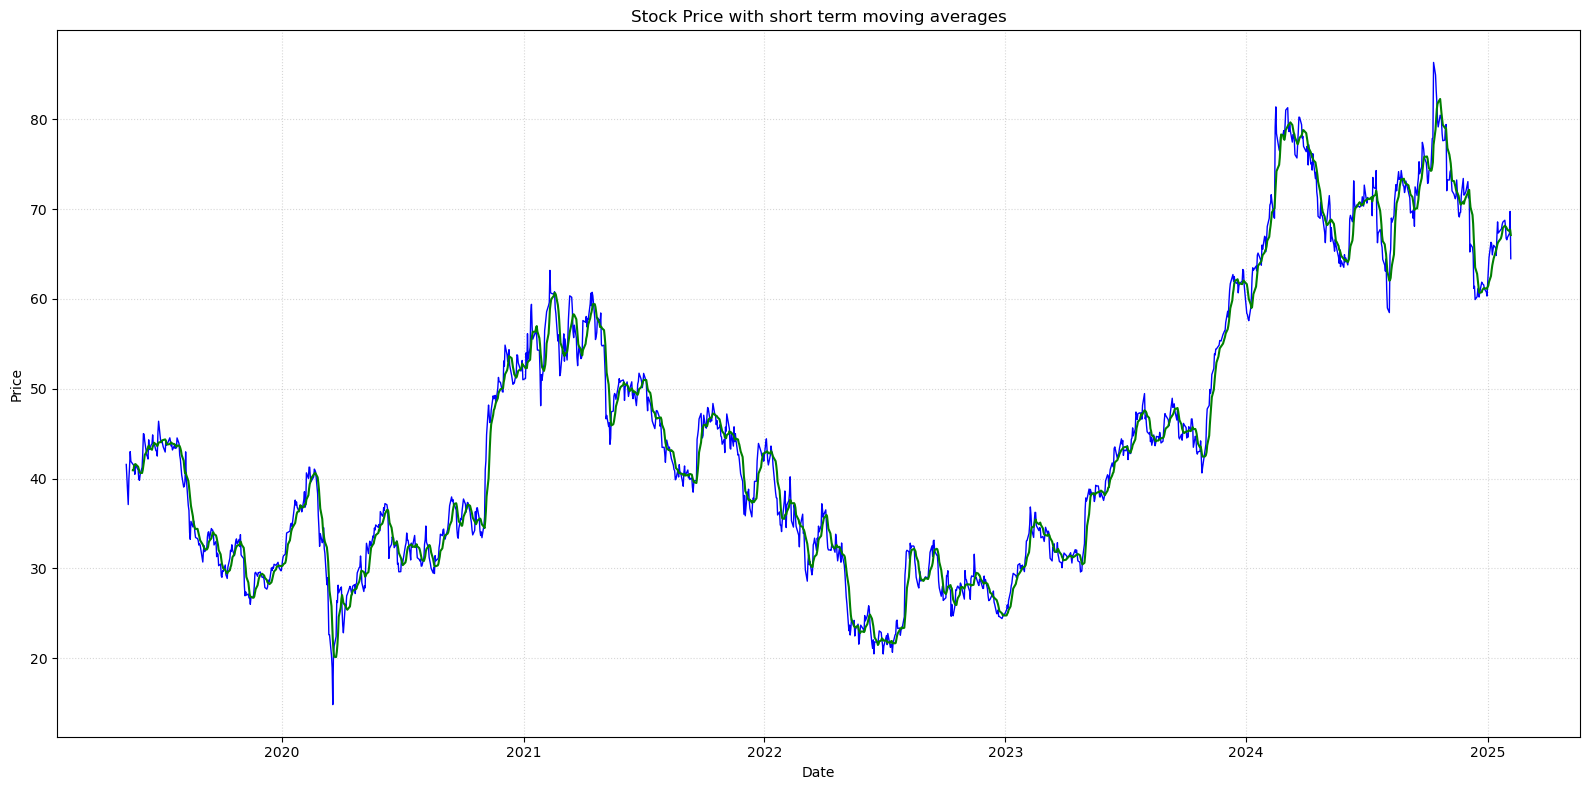

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("uber_stock_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Short-term 
df['SMA_7'] = df['Close'].rolling(window=7).mean()    
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['Close'], label='Close', color='blue', linewidth=1)
plt.plot(df.index, df['SMA_7'], label='SMA 7', color='green', linewidth=1.5)
plt.title('Stock Price with short term moving averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()



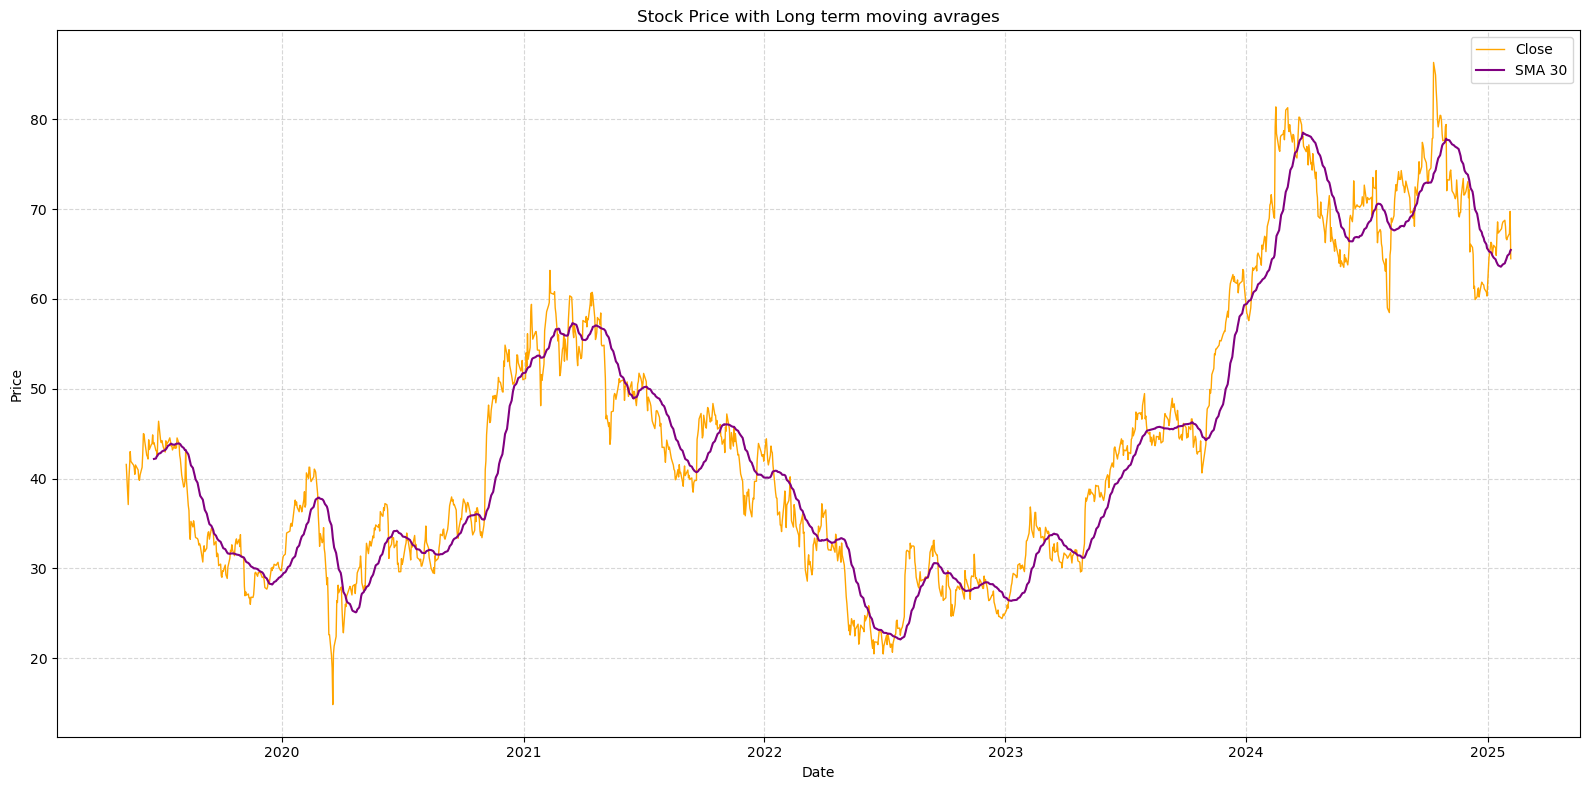

In [3]:
#Long-term Moving Averages
plt.figure(figsize=(16, 8))
df['SMA_30'] = df['Close'].rolling(window=30).mean()  # Long-term
plt.plot(df.index, df['Close'], label='Close', color='orange', linewidth=1)
plt.plot(df.index, df['SMA_30'], label='SMA 30', color='purple', linewidth=1.5)

# Format
plt.title('Stock Price with Long term moving avrages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


C:\Users\conne\AppData\Local\Temp\ipykernel_9448\109272523.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Close'].fillna(method='ffill', inplace=True)
C:\Users\conne\AppData\Local\Temp\ipykernel_9448\109272523.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Close'].fillna(method='ffill', inplace=True)


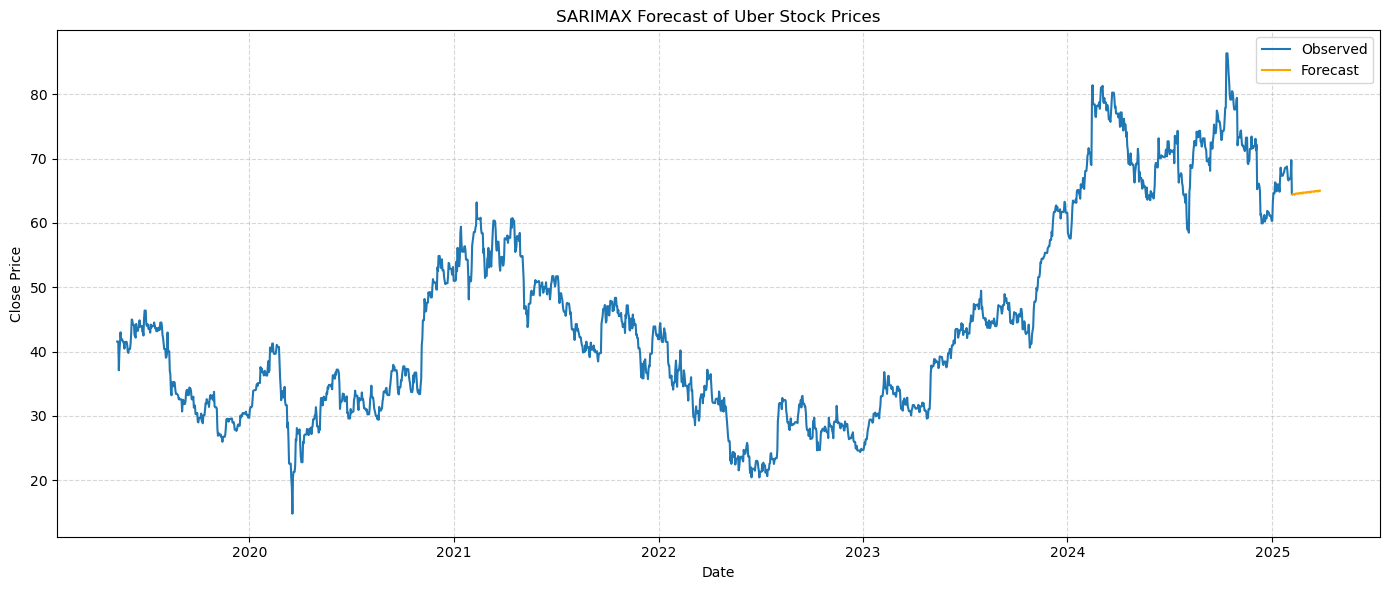

In [9]:

# Load and prepare the dataset
df = pd.read_csv('uber_stock_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.asfreq('D')  # Set daily frequency (fill missing if any)

# Handle missing values if present
df['Close'].fillna(method='ffill', inplace=True)

# Define endogenous variable
y = df['Close']

# Fit the SARIMAX model
# SARIMAX(p,d,q)(P,D,Q,s) where s = seasonal length (e.g., 7 for weekly seasonality)
model = SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
results = model.fit(disp=False)

# Forecast future values
forecast_steps = 50
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=y.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Confidence intervals
conf_int = forecast.conf_int()

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(y.index, y, label='Observed')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='orange')
plt.title('SARIMAX Forecast of Uber Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\conne\AppData\Local\Temp\ipykernel_9448\2885750419.py:4: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  holt = Holt(df['Close']).fit(smoothing_level=0.8, smoothing_slope=0.2)
C:\Users\conne\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


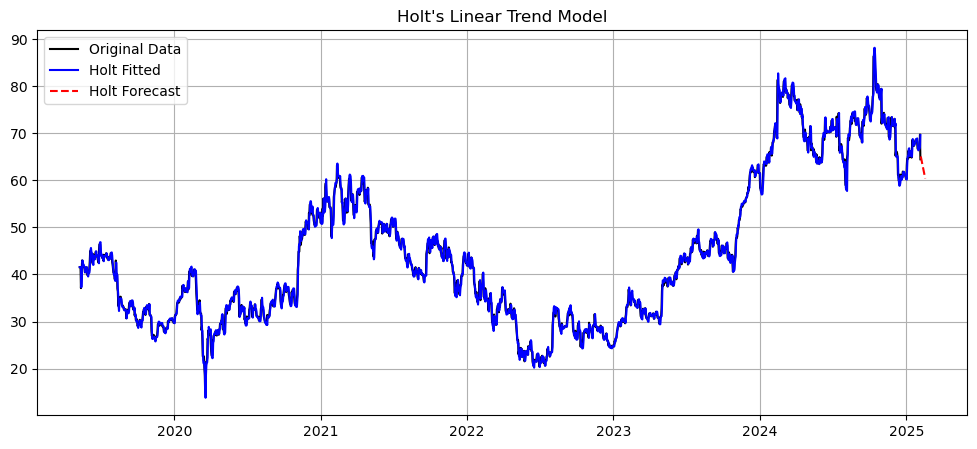

In [11]:
from statsmodels.tsa.holtwinters import Holt

#fit model
holt = Holt(df['Close']).fit(smoothing_level=0.8, smoothing_slope=0.2)

#Forecast next 12 months
future_holt =  holt.forecast(12)

#Plot
plt.figure(figsize=(12,5))
plt.plot(df['Close'], label="Original Data", color = "black")
plt.plot(holt.fittedvalues, label="Holt Fitted", color = "blue")
plt.plot(future_holt, label="Holt Forecast", color = "red", linestyle = "dashed")
plt.title("Holt's Linear Trend Model")
plt.legend()
plt.grid()
plt.show()